In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dataset= pd.read_csv("/content/drive/MyDrive/CSE422/Heart Disease.csv")
dataset.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print("Dataset Shape:",dataset.shape)

Dataset Shape: (4240, 16)


In [ ]:
dataset.isnull().sum()

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
(dataset.isnull().sum()/dataset.shape[0])*100 # Percentage of missing data

,0
gender,0.000000
age,0.000000
education,2.476415
currentSmoker,0.000000
cigsPerDay,0.683962
BPMeds,1.250000
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.179245


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            4240 non-null   object 
 1   age                               4240 non-null   int64  
 2   education                         4135 non-null   float64
 3   currentSmoker                     4240 non-null   int64  
 4   cigsPerDay                        4211 non-null   float64
 5   BPMeds                            4187 non-null   float64
 6   prevalentStroke                   4240 non-null   int64  
 7   prevalentHyp                      4240 non-null   int64  
 8   diabetes                          4240 non-null   int64  
 9   totChol                           4190 non-null   float64
 10  sysBP                             4240 non-null   float64
 11  diaBP                             4240 non-null   float64
 12  BMI   

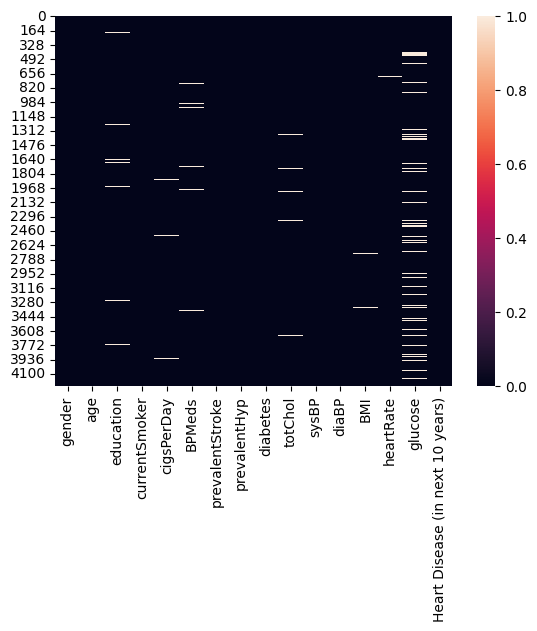

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()

In [ ]:
dataset= dataset.drop(["education","prevalentStroke", "prevalentHyp"], axis =1) # drop column
dataset.shape

(4240, 13)

In [ ]:
dataset.head(20)

,gender,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43,0,0.0,0.0,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63,0,0.0,0.0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45,1,20.0,0.0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52,0,0.0,0.0,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43,1,30.0,0.0,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Handle Missing Values

In [ ]:
dataset['cigsPerDay'].fillna((0), inplace=True)

<ipython-input-10-130c42a9d20c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['cigsPerDay'].fillna((0), inplace=True)


In [ ]:
dataset.isnull().sum()

,0
gender,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,53
diabetes,0
totChol,50
sysBP,0
diaBP,0
BMI,19


In [ ]:
# Fill missing values in the 'glucose' column with the mean
dataset['glucose'].fillna(dataset['glucose'].mean(), inplace=True)

<ipython-input-12-83f901221b50>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['glucose'].fillna(dataset['glucose'].mean(), inplace=True)


In [ ]:
for col in ['BPMeds', 'totChol', 'BMI', 'heartRate']:
    dataset[col].fillna(dataset[col].median(), inplace=True)


<ipython-input-13-e95ee51bc3c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].median(), inplace=True)


In [ ]:
categorical_cols = dataset.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

<ipython-input-14-3f346b3e4da0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


# Scalling


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for 'age' column
dataset = remove_outliers_iqr(dataset, 'age')

# Example usage for 'totChol' column
dataset = remove_outliers_iqr(dataset, 'totChol')


In [ ]:
# Apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['totChol','sysBP', 'diaBP'] #add more columns as needed
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
dataset.head()


,gender,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,0,0.0,0.0,0,0.319820,0.106383,0.232804,26.97,80.0,77.0,0
1,Female,46,0,0.0,0.0,0,0.567568,0.177305,0.349206,28.73,95.0,76.0,0
2,Male,48,1,20.0,0.0,0,0.545045,0.208038,0.338624,25.34,75.0,70.0,0
3,Female,61,1,30.0,0.0,0,0.454955,0.314421,0.497354,28.58,65.0,103.0,1
4,Female,46,1,23.0,0.0,0,0.725225,0.219858,0.380952,23.10,85.0,85.0,0


# Encoding

In [ ]:
le = LabelEncoder()
dataset["gender"] = le.fit_transform(dataset["gender"])

In [ ]:
dataset.head(20)

,gender,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,1,39,0,0.0,0.0,0,0.319820,0.106383,0.232804,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0.567568,0.177305,0.349206,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0.545045,0.208038,0.338624,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,0.454955,0.314421,0.497354,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0.725225,0.219858,0.380952,23.10,85.0,85.000000,0
5,0,43,0,0.0,0.0,0,0.468468,0.456265,0.656085,30.30,77.0,99.000000,0
6,0,63,0,0.0,0.0,0,0.364865,0.257683,0.243386,33.11,60.0,85.000000,1
7,0,45,1,20.0,0.0,0,0.851351,0.078014,0.243386,21.68,79.0,78.000000,0
8,1,52,0,0.0,0.0,0,0.612613,0.274232,0.433862,26.36,76.0,79.000000,0
9,1,43,1,30.0,0.0,0,0.454955,0.371158,0.624339,23.61,93.0,88.000000,0


In [ ]:
# Feature Engineering
X = dataset.drop("Heart Disease (in next 10 years)", axis=1)
y = dataset["Heart Disease (in next 10 years)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
preprocessed_data = {
    "X_train": X_train_scaled,
    "X_test": X_test_scaled,
    "y_train": y_train,
    "y_test": y_test,
    "feature_names": X.columns,
}

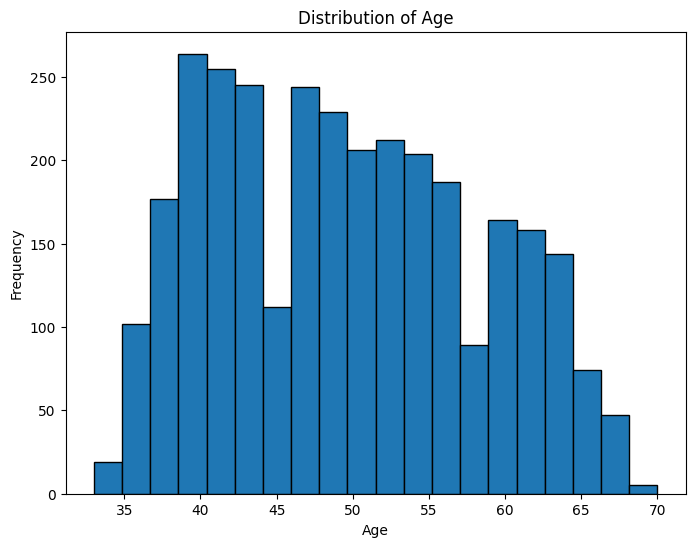

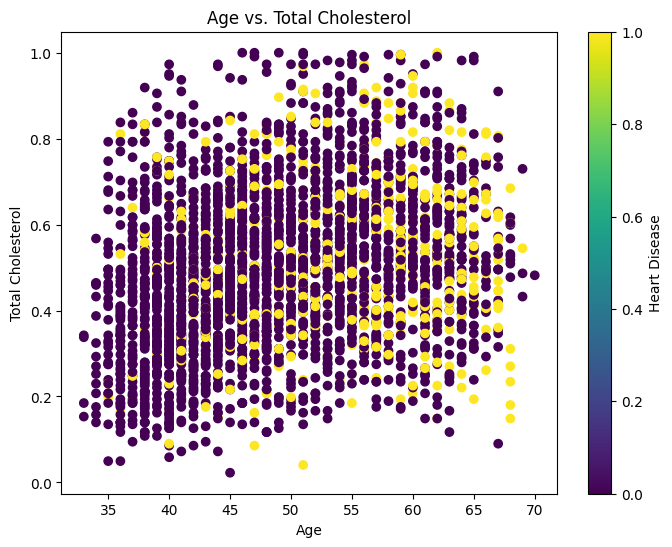

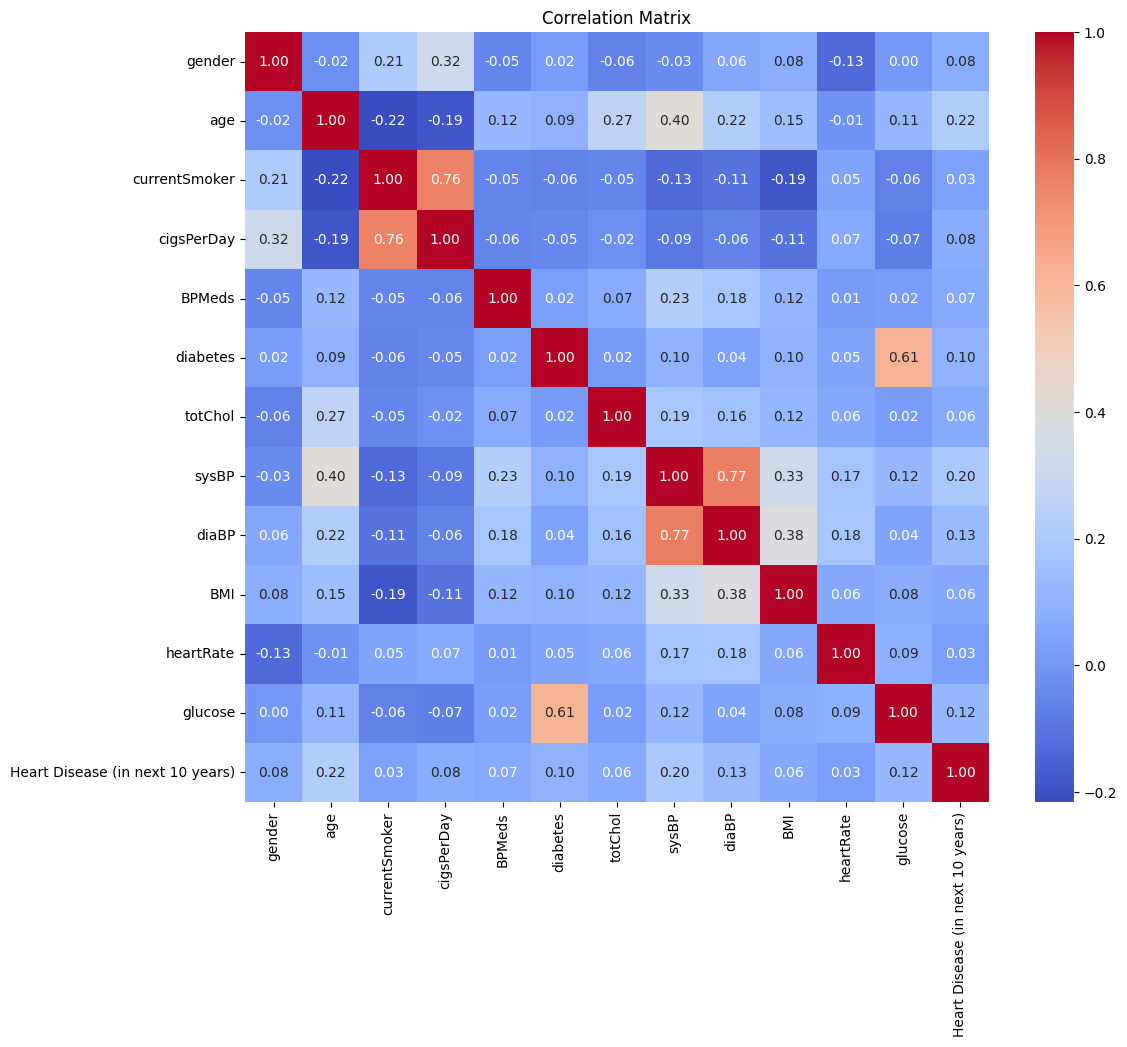

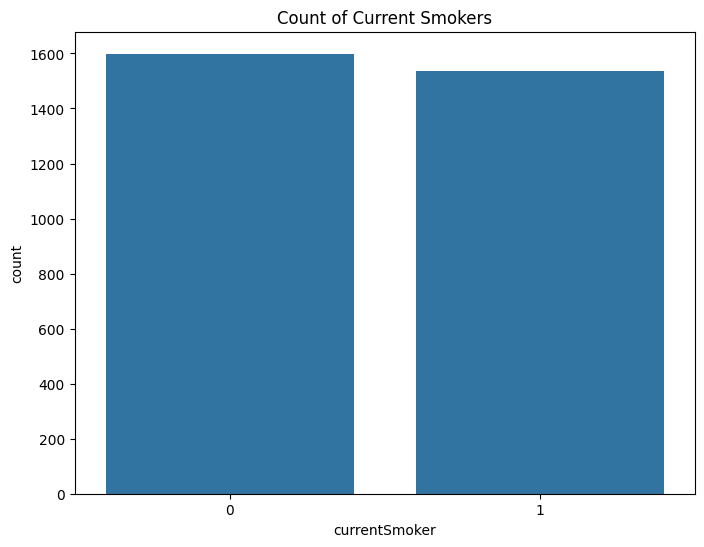

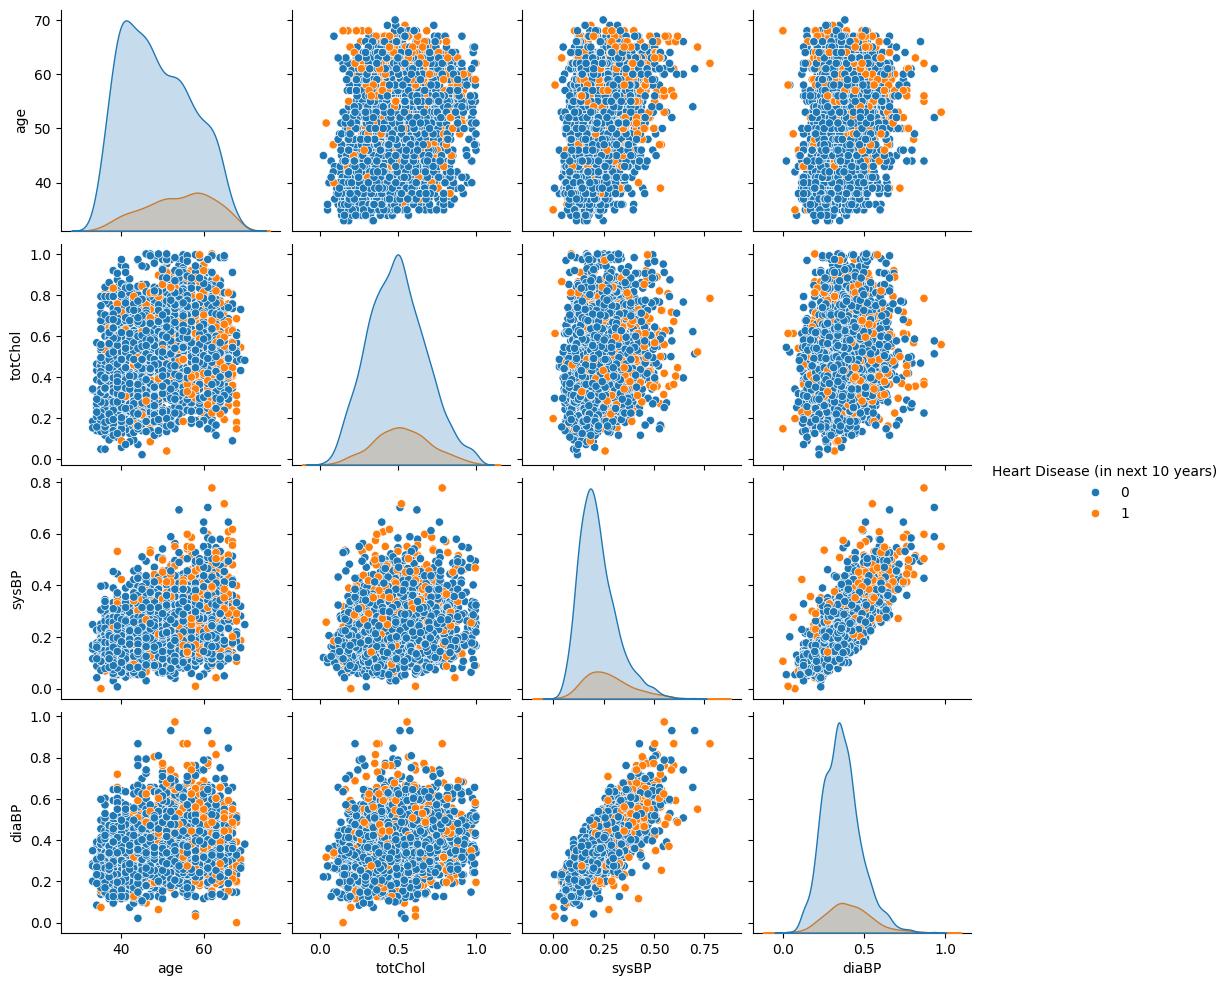

In [ ]:
feature_names = preprocessed_data["feature_names"]

# Create a DataFrame from the scaled training data
df_scaled = pd.DataFrame(X_train, columns=feature_names)
df_scaled['Heart Disease (in next 10 years)'] = y_train

# Histogram of a numerical feature
plt.figure(figsize=(8, 6))
plt.hist(df_scaled['age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Scatter plot of two numerical features
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['age'], df_scaled['totChol'], c=df_scaled['Heart Disease (in next 10 years)'], cmap='viridis') #color by target variable
plt.title('Age vs. Total Cholesterol')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.colorbar(label='Heart Disease')
plt.show()


# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Countplot of a categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(x='currentSmoker', data=df_scaled)
plt.title('Count of Current Smokers')
plt.show()

# Pairplot (only a few features to avoid overcrowding)
sns.pairplot(df_scaled[['age', 'totChol', 'sysBP','diaBP','Heart Disease (in next 10 years)']], hue='Heart Disease (in next 10 years)')
plt.show()



# Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM (probability)": SVC(probability=True),
}


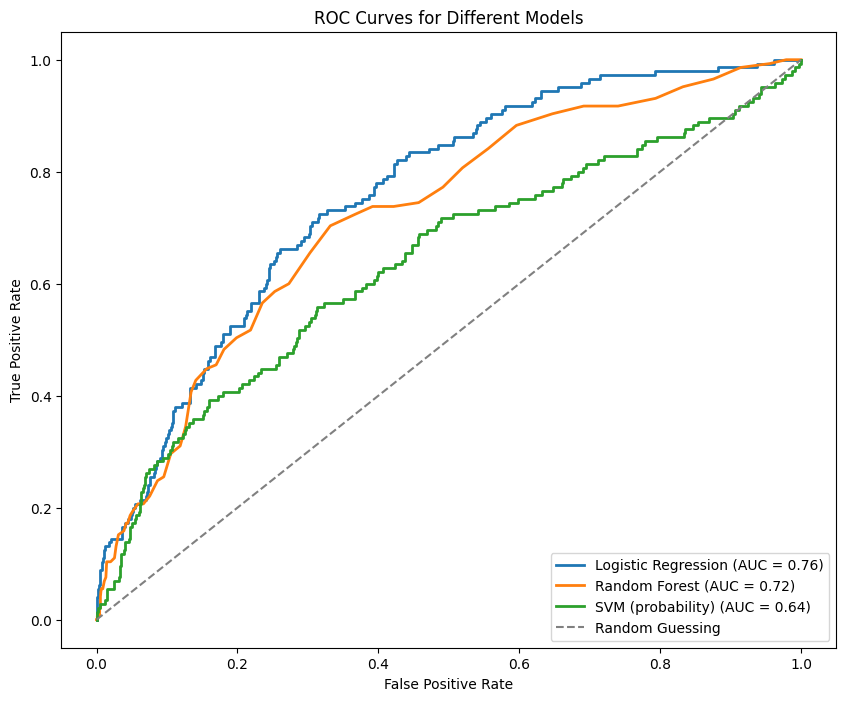

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


Confusion Matrix for Logistic Regression:
[[896   5]
 [132  13]]
Accuracy for Logistic Regression: 0.8690248565965584



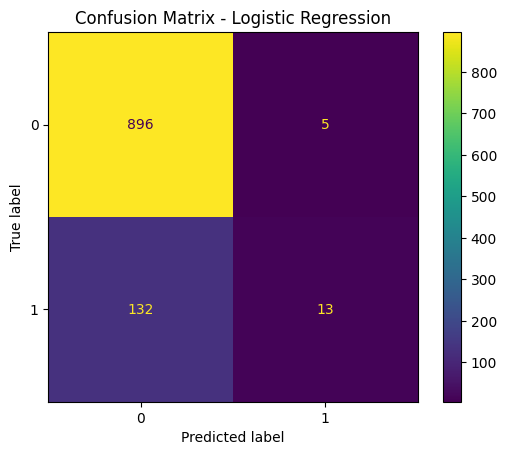

Confusion Matrix for Random Forest:
[[895   6]
 [137   8]]
Accuracy for Random Forest: 0.8632887189292543



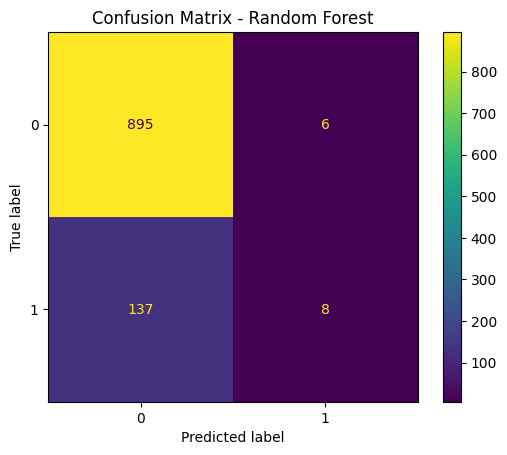

Confusion Matrix for SVM (probability):
[[897   4]
 [141   4]]
Accuracy for SVM (probability): 0.861376673040153



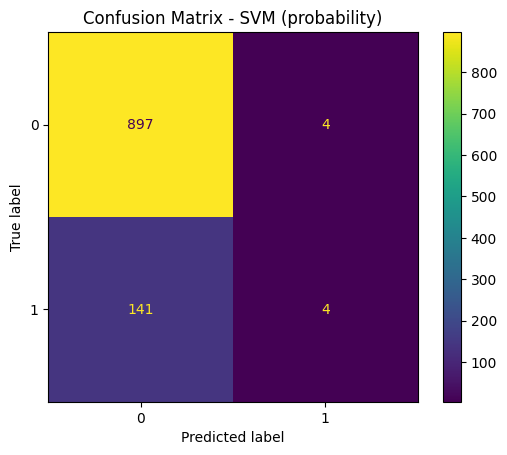

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}\n")

    # Confusion Matrix Display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()




In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       901
           1       0.72      0.09      0.16       145

    accuracy                           0.87      1046
   macro avg       0.80      0.54      0.54      1046
weighted avg       0.85      0.87      0.82      1046


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       901
           1       0.57      0.06      0.10       145

    accuracy                           0.86      1046
   macro avg       0.72      0.52      0.51      1046
weighted avg       0.83      0.86      0.81      1046


Classification Report for SVM (probability):
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       901
           1       0.50      0.03      0.05       145

    accuracy                           0.86    